In [1]:
##### LIBRERIAS #####

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.impute import SimpleImputer
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, cross_val_score , validation_curve

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/titanic.csv')

In [3]:
datos.shape

(891, 12)

In [4]:
datos.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
datos.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S


### CARACTERÍSTICAS ###

* PassengerIdUnique ID of the passenger
* SurvivedSurvived (1) or died (0)
* PclassPassenger's class (1st, 2nd, or 3rd)
* NamePassenger's name
* SexPassenger's sex
* AgePassenger's age
* SibSpNumber of siblings/spouses aboard the Titanic
* ParchNumber of parents/children aboard the Titanic
* TicketTicket number
* FareFare paid for ticket
* CabinCabin number
* EmbarkedWhere the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [6]:
##### Se editan algunas características que no parecen ser importantes.

datos.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [7]:
datos.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
164,0,3,male,1.0,4,1,39.6875
227,0,3,male,20.5,0,0,7.2500
142,1,3,female,24.0,1,0,15.8500
43,1,2,female,3.0,1,2,41.5792
7,0,3,male,2.0,3,1,21.0750
546,1,2,female,19.0,1,0,26.0000
438,0,1,male,64.0,1,4,263.0000
608,1,2,female,22.0,1,2,41.5792
866,1,2,female,27.0,1,0,13.8583
558,1,1,female,39.0,1,1,79.6500


In [8]:
##### Es necesario completar los valores faltantes en la columna ‘Age’, en este caso usando el promedio #####

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [9]:
datos.loc[datos['Survived']==1,['Age']]=imp.fit_transform(datos.loc[datos['Survived']==1,['Age']])
datos.loc[datos['Survived']==0,['Age']]=imp.fit_transform(datos.loc[datos['Survived']==0,['Age']])

In [10]:
datos.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [11]:
""" 
Se aplica one-hot-encoding a la caracteristica categorica ***sex*** 
y se crea una nueva columna que se llamada "Family_size" 
"""

datos = pd.get_dummies(datos, drop_first=True)

In [12]:
datos['Family_size']=datos['SibSp'] + datos['Parch']
datos.drop(['SibSp', 'Parch'] ,axis=1, inplace=True)
datos.head()

,Survived,Pclass,Age,Fare,Sex_male,Family_size
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,0,1
2,1,3,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,0,3,35.0,8.0500,1,0


In [13]:
X = datos.iloc[:,1:]
y = datos.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
"""
Se implementa el modelo de regresión logistica usando Sklearn y se analiza su 
desempeño usando validación cruzada, curvas de aprendizaje y curvas de validación.
"""

X.head()

,Pclass,Age,Fare,Sex_male,Family_size
0,3,22.0,7.2500,1,1
1,1,38.0,71.2833,0,1
2,3,26.0,7.9250,0,0
3,1,35.0,53.1000,0,1
4,3,35.0,8.0500,1,0


In [15]:
"""
Los datos se normalizaron usando `StandardScaler` y se ha hecho una simple interacción 
entre características usando `PolynomialFeatures`
"""

model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('logreg', LogisticRegression(C=50, solver='liblinear'))
))

In [16]:
##### Validacion cruzada #####

scores = cross_val_score(model, X, y, cv=7)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.818 +/- 0.026


In [22]:
##### Curvas de validacion #####

param_range = np.hstack([np.arange(0.01,1.0,0.03), np.linspace(1.1,100,20)])
train_scores, test_scores = validation_curve(model,X,y, param_name="logreg__C", param_range=param_range, scoring='accuracy',n_jobs=-1)

(-2.0, 110.0)

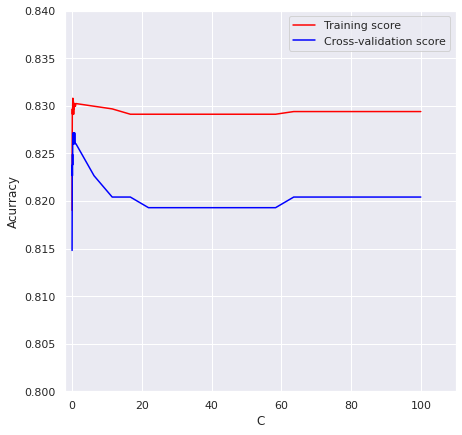

In [27]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(7,7))
plt.plot(param_range, train_scores_mean, label="Training score",color='red')
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color='blue')
plt.xlabel('C')
plt.ylabel('Acurracy')
plt.legend(loc="best")
plt.ylim(0.8,0.84)
plt.xlim(-2,110)

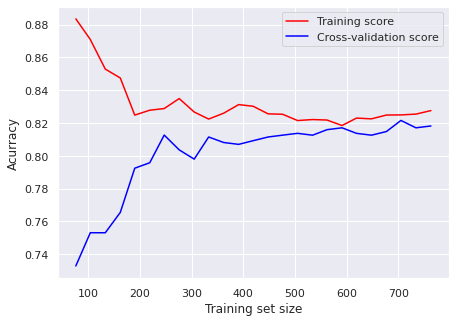

In [29]:
##### CURVAS DE APRENDIZAJE #####

N, train_score, test_score=learning_curve(model,X,y, train_sizes=np.linspace(0.1,1,25), cv=7, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(7,5))
plt.plot(N,np.mean(train_score,1), label="Training score", color='red')
plt.plot(N,np.mean(test_score,1),label="Cross-validation score", color='blue')
plt.xlabel('Training set size')
plt.ylabel('Acurracy')
plt.legend(loc="best")